In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv(r'E:/New folder/car_data.csv')
df

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners,Price(in rupees)
0,Maruti Suzuki Swift Dzire Tour,2018,65000.0,DIESEL,2nd,530000
1,Skoda Rapid,2013,81000.0,DIESEL,2nd,455000
2,,,,,,
3,Hyundai Xcent,2016,70000,CNG,First,380000
4,Renault Duster,2014,120000,DIESEL,Second,425000
...,...,...,...,...,...,...
1970,Hyundai Santro,2018,15000.0,PETROL,1st,435000
1971,Mahindra Xuv500,2018,39841.0,DIESEL,1st,1399000
1972,Renault Triber,2019,16930.0,PETROL,1st,650000
1973,Maruti Suzuki Swift Dzire Tour,2018,65000.0,DIESEL,2nd,530000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              1975 non-null   object
 1   Year               1975 non-null   object
 2   Kilometers Driven  1975 non-null   object
 3   Fuel Type          1975 non-null   object
 4   No of Owners       1975 non-null   object
 5   Price(in rupees)   1975 non-null   object
dtypes: object(6)
memory usage: 92.7+ KB


In [4]:
df.shape

(1975, 6)

In [5]:
# Missing Values
print(df.isna().sum())

Brand                0
Year                 0
Kilometers Driven    0
Fuel Type            0
No of Owners         0
Price(in rupees)     0
dtype: int64


<AxesSubplot:>

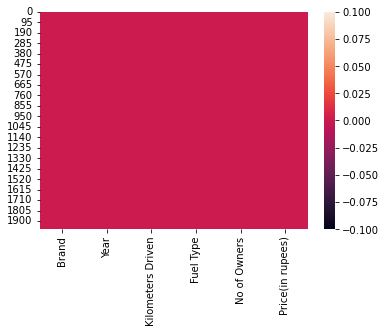

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.dropna(how='any',inplace=True)


In [8]:
df.isna().values.any()

False

In [9]:
df['Brand'].unique()

array(['Maruti Suzuki Swift Dzire Tour', 'Skoda Rapid', ' ',
       'Hyundai Xcent', 'Renault Duster', 'Ashok Leyland Stile',
       'Hyundai Fluidic Verna', 'Hyundai I20', 'Maruti Suzuki Celerio',
       'Hyundai Verna', 'Maruti Suzuki Wagon R', 'Honda City',
       'Maruti Suzuki Zen', 'Hyundai Santro', 'Toyota Etios',
       'Mahindra Marazzo', 'Ford Ecosport', 'Hyundai I10', 'Bmw 3 Series',
       'Mahindra Bolero Pik-Up', 'Toyota Innova', 'Maruti Suzuki Alto',
       'Maruti Suzuki 800', 'Mercedes-Benz New C-Class',
       'Toyota Etios Liva', 'Mahindra Bolero', 'Skoda Octavia',
       'Maruti Suzuki Estilo', 'Hyundai Accent',
       'Maruti Suzuki Swift Dzire', 'Mahindra Xuv500', 'Renault Triber'],
      dtype=object)

In [10]:
df['Brand'].value_counts()

Honda City                        245
Hyundai I20                       148
Hyundai Santro                     98
                                   97
Renault Duster                     66
Maruti Suzuki Swift Dzire Tour     51
Skoda Rapid                        51
Maruti Suzuki Wagon R              50
Ashok Leyland Stile                50
Hyundai Xcent                      50
Maruti Suzuki Estilo               49
Bmw 3 Series                       49
Mahindra Bolero                    49
Toyota Etios Liva                  49
Maruti Suzuki Alto                 49
Toyota Innova                      49
Skoda Octavia                      49
Ford Ecosport                      49
Hyundai I10                        49
Maruti Suzuki Zen                  49
Hyundai Verna                      49
Hyundai Fluidic Verna              49
Renault Triber                     49
Mahindra Bolero Pik-Up             48
Mahindra Marazzo                   48
Toyota Etios                       48
Maruti Suzuk

In [11]:
df['Year'].unique()

array(['2018', '2013', ' ', '2016', '2014', '2022', '2015', '2017',
       '2004', '2019', '2011', '2000', '2008', '2003', '2020', '2010'],
      dtype=object)

In [12]:
df['Year'].value_counts()

2015    441
2018    245
2013    167
2017    146
2014    145
2016     99
2004     98
2011     98
2008     98
         97
2019     97
2022     50
2020     49
2010     49
2000     48
2003     48
Name: Year, dtype: int64

In [13]:
df['Kilometers Driven'].unique()

array(['65000.0', '81000.0', ' ', '70000', '120000', '18', '190,000',
       '70,500', '90000.0', '60000.0', '110000.0', '57000.0', '53000.0',
       '155,000', '110,000', '65,245', '19,500', '46,928', '9280.0',
       '30000', '160000', '3,200', '85,000', '40000', '106,418', '--',
       '117,000', '64000.0', '10000.0', '40000.0', '49,000', '100,000',
       '15000.0', '39841.0', '16930.0', '106,579', '46928.0', '53,000'],
      dtype=object)

In [14]:
df['Kilometers Driven'].value_counts()

65000.0     100
60000.0      98
             97
90000.0      96
53000.0      96
81000.0      51
70000        50
18           50
70,500       50
110000.0     50
57000.0      50
64000.0      49
117,000      49
--           49
106,418      49
100,000      49
3,200        49
160000       49
110,000      49
9280.0       49
15000.0      49
16930.0      49
40000.0      49
155,000      49
190,000      49
10000.0      49
39841.0      48
49,000       48
46928.0      48
30000        48
40000        48
85,000       48
19,500       48
65,245       48
120000       48
106,579      18
46,928        1
53,000        1
Name: Kilometers Driven, dtype: int64

In [15]:
# removing the commas in kilometers value.
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace(r',', '')

In [16]:
df['Kilometers Driven'].unique

<bound method Series.unique of 0       65000.0
1       81000.0
2              
3         70000
4        120000
         ...   
1970    15000.0
1971    39841.0
1972    16930.0
1973    65000.0
1974    81000.0
Name: Kilometers Driven, Length: 1975, dtype: object>

In [17]:
df['No of Owners'].unique()

array(['2nd', ' ', 'First', 'Second', '1st', '3rd', '4th'], dtype=object)

In [18]:
# Merging the 'First' and '1st owners' to 1st owners.
# Merging the 'Second' and '2nd owners' to 2nd owners.

df['No of Owners'] = df['No of Owners'].replace(['First'],'1st')
df['No of Owners'] = df['No of Owners'].replace(['Second'],'2nd')

In [19]:
df['No of Owners'].value_counts()

1st    1191
2nd     590
         97
3rd      49
4th      48
Name: No of Owners, dtype: int64

In [20]:
df['Fuel Type'].unique()

array(['DIESEL', ' ', 'CNG', 'PETROL'], dtype=object)

In [21]:
df['Fuel Type'].value_counts()

DIESEL    1096
PETROL     732
            97
CNG         50
Name: Fuel Type, dtype: int64

In [22]:
df['Price(in rupees)'].unique()

array(['530000', '455000', ' ', '380000', '425000', '900000', '525000',
       '550000', '340000', '649999', '690000', '975000', '145000',
       '85000', '395000', '651000', '335000', '950000', '499999',
       '245000', '4250000', '590000', '800000', '1140000', '32000',
       '2650000', '390000', '460000', '220000', '150000', '110000',
       '1325000', '675000', '230000', '435000', '1399000', '650000',
       '350000'], dtype=object)

In [23]:
df['Price(in rupees)'].value_counts()

425000     98
           97
675000     97
530000     51
455000     51
900000     50
550000     50
380000     50
690000     50
650000     49
435000     49
230000     49
4250000    49
1325000    49
150000     49
220000     49
460000     49
390000     49
1140000    49
800000     49
245000     49
85000      49
145000     49
525000     49
649999     49
651000     49
395000     49
499999     49
1399000    48
340000     48
975000     48
590000     48
110000     48
335000     48
2650000    48
32000      48
950000     48
350000     18
Name: Price(in rupees), dtype: int64

# Univariate Analysis

Total number of Brands are =  32


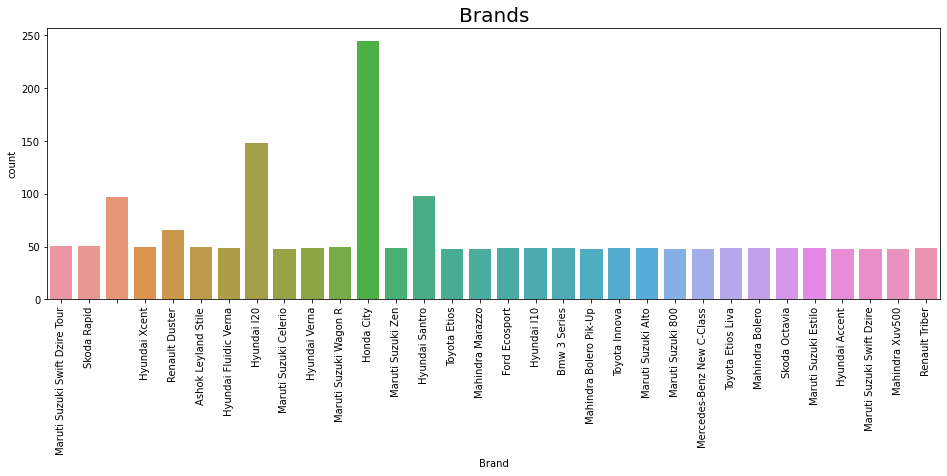

In [24]:
import matplotlib.pyplot as plt
print("Total number of Brands are = ",len(df['Brand'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Brand", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Brands", fontsize = 20)
plt.show()

As per the above chart we conclude that most demanding car is Honda City.

Total number of Years are =  16


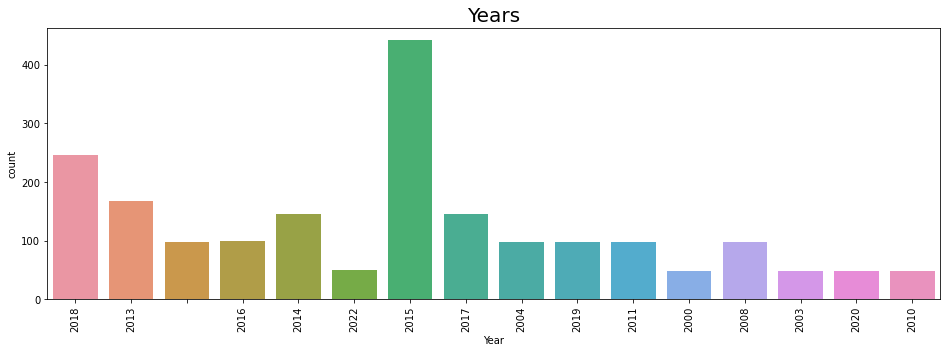

In [25]:
print("Total number of Years are = ",len(df['Year'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Year", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Years", fontsize = 20)
plt.show()

As per the above chart we conclude that in Year 2015 more demend of cars.

Total number of Kilometers Driven are =  38


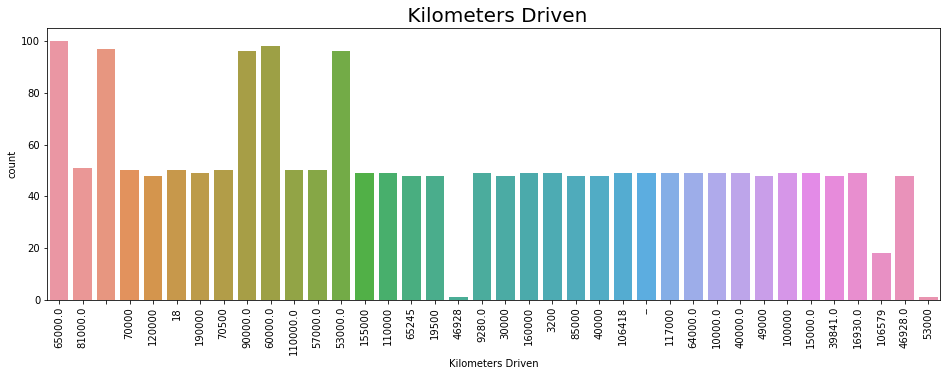

In [26]:
print("Total number of Kilometers Driven are = ",len(df['Kilometers Driven'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Kilometers Driven", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(" Kilometers Driven", fontsize = 20)
plt.show()

Total number of Fuel Type are =  4


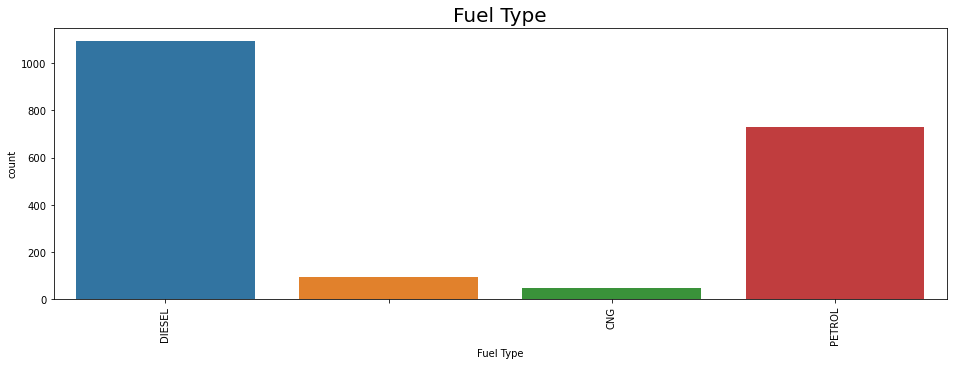

In [27]:
print("Total number of Fuel Type are = ",len(df['Fuel Type'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Fuel Type", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Fuel Type", fontsize = 20)
plt.show()

As per the above chart we conclude that in Disel Fuel type is used by most of the people as compare to petrol.

Total number of Owners are =  5


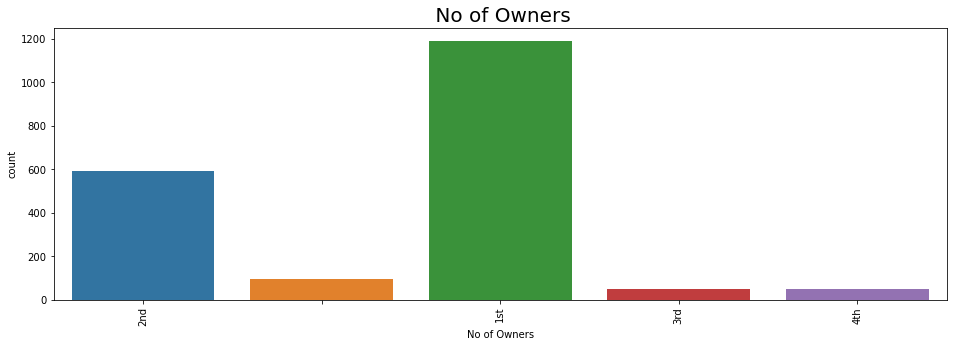

In [28]:
print("Total number of Owners are = ",len(df['No of Owners'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="No of Owners", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(" No of Owners", fontsize = 20)
plt.show()

As per the above chart we conclude that 1st owners are more as compare to 2nd owner.

Total number of Price are =  38


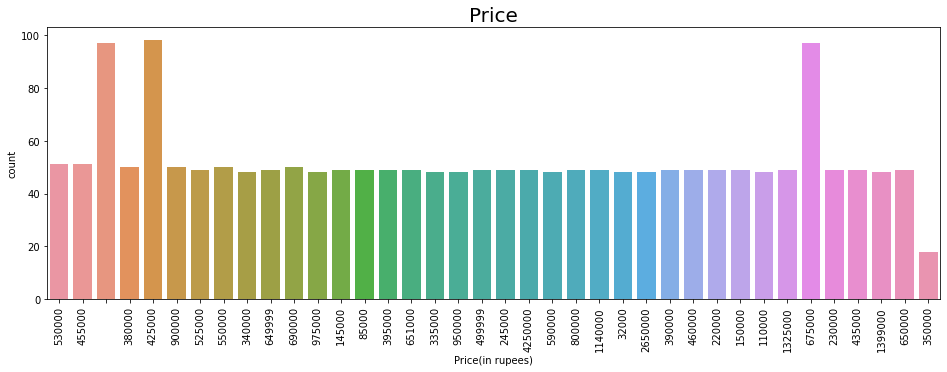

In [29]:
print("Total number of Price are = ",len(df['Price(in rupees)'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Price(in rupees)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Price", fontsize = 20)
plt.show()

As per the above chart we conclude that the highest used car price is 675000 and 425000 .

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [34]:
 from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Fuel Type'] = labelencoder.fit_transform(df['Fuel Type'])
df['No of Owners'] = labelencoder.fit_transform(df['No of Owners'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1974
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1975 non-null   float64
 1   Year               1975 non-null   float64
 2   Kilometers Driven  1975 non-null   float64
 3   Fuel Type          1975 non-null   int64  
 4   No of Owners       1975 non-null   int64  
 5   Price(in rupees)   1975 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 172.5 KB


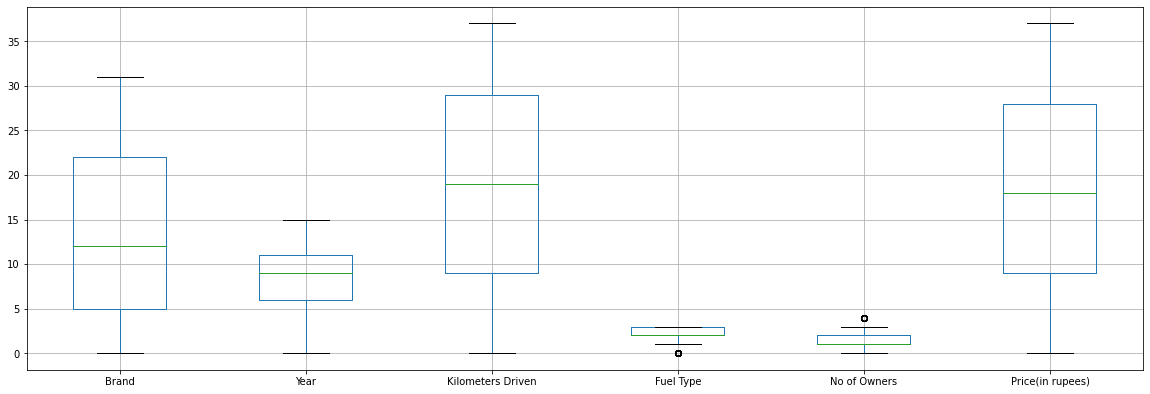

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [38]:
df.corr()

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners,Price(in rupees)
Brand,1.000000,0.008673,-0.041025,0.200362,0.383321,-0.057339
Year,0.008673,1.000000,0.126588,0.162458,-0.222212,0.547082
Kilometers Driven,-0.041025,0.126588,1.000000,0.198318,0.183194,0.153670
Fuel Type,0.200362,0.162458,0.198318,1.000000,0.429858,0.071894
No of Owners,0.383321,-0.222212,0.183194,0.429858,1.000000,-0.099022
Price(in rupees),-0.057339,0.547082,0.153670,0.071894,-0.099022,1.000000


# Multi-Variate Analysis

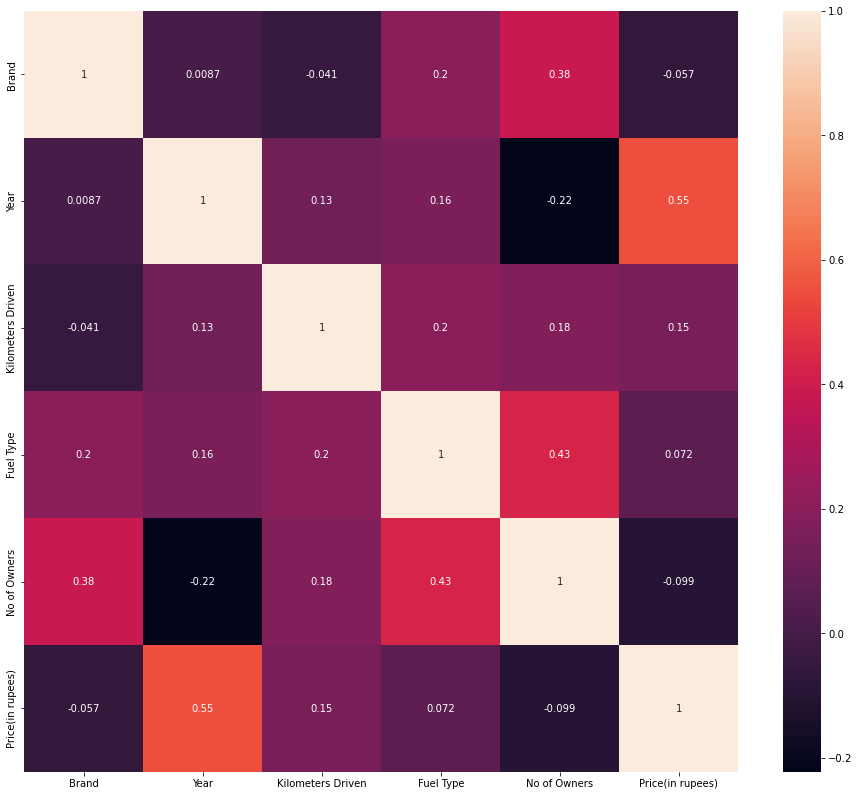

In [42]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

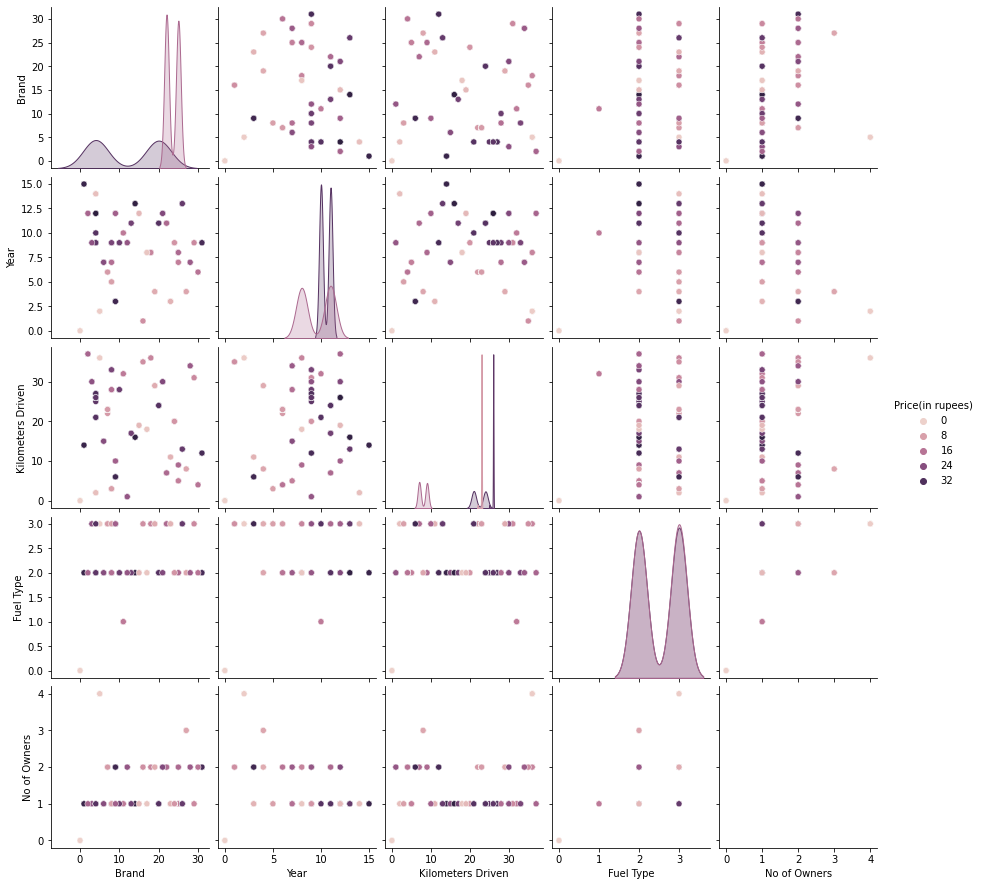

In [43]:
sns.pairplot(df,hue="Price(in rupees)")

# Removing Outliers:

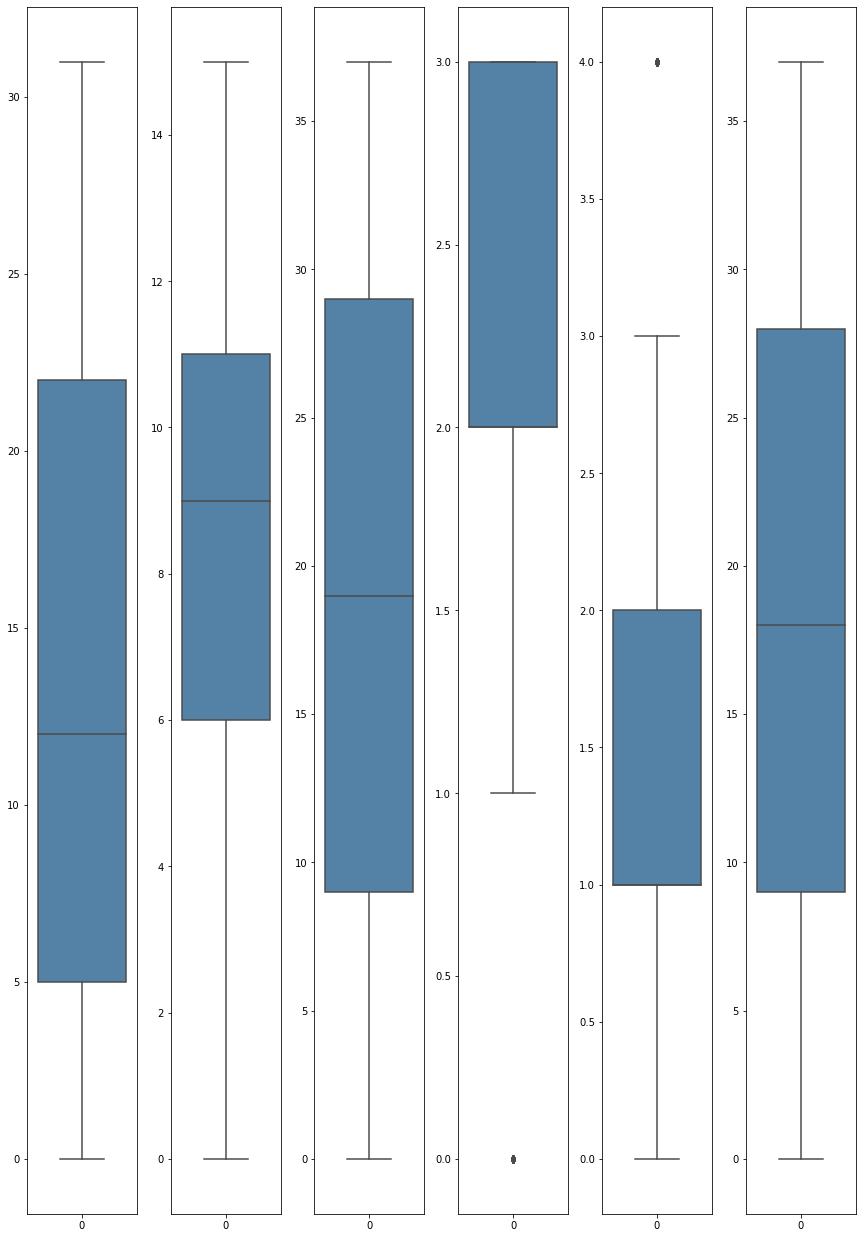

In [44]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='steelblue',orient='v')
    plt.tight_layout()

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [46]:
new_df=df[(z<3).all(axis=1)]

In [47]:
new_df.shape

(1830, 6)

In [48]:
df.shape

(1975, 6)

In [49]:
''' Data Loss '''

Data_loss = ((6000-5850)/6000)*100
Data_loss

2.5

The loss of data after removing the ouliers is 2.5%.

# Skewness:

In [50]:
new_df.skew()

Brand                0.267655
Year                -0.373320
Kilometers Driven   -0.119598
Fuel Type            0.085570
No of Owners         1.025217
Price(in rupees)    -0.071467
dtype: float64

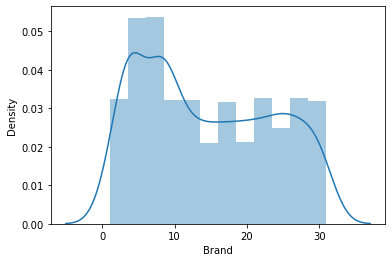

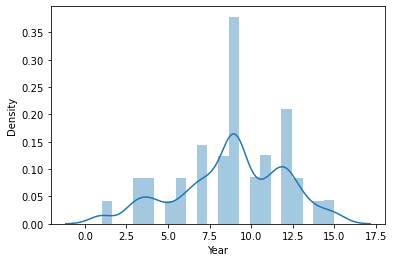

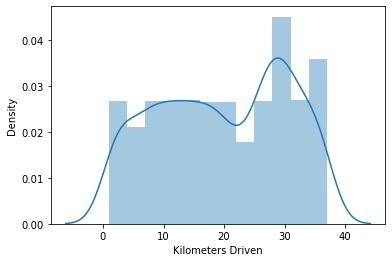

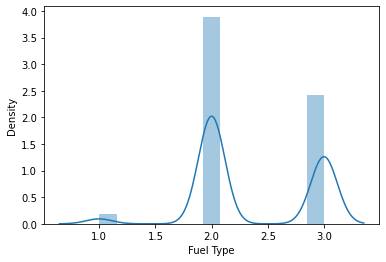

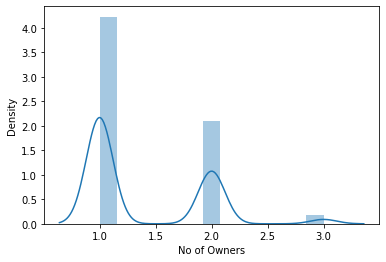

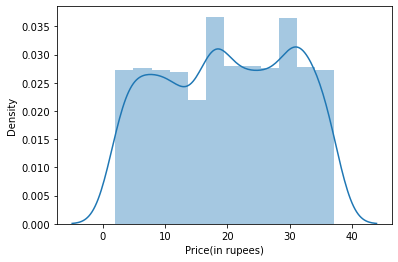

In [51]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

In [52]:
for i in new_df.columns:
    
    # we are using log transformation method to remove skewness
    if new_df.skew().loc[i]>0.5:
        new_df[i]=np.log1p(new_df[i])
        
        # we are using square method to remove skewness
        if new_df.skew().loc[i]<-0.5:
            new_df[i]=np.square(new_df[i])

In [54]:
new_df.skew()

Brand                0.267655
Year                -0.373320
Kilometers Driven   -0.119598
Fuel Type            0.085570
No of Owners         0.831885
Price(in rupees)    -0.071467
dtype: float64

# Seperating Input and Output Variables

In [55]:
x = df.drop(columns = "Price(in rupees)")
y = df["Price(in rupees)"]

# Scaling

In [56]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler() #Initializting MinMaxScaler
scale_x=scaler.fit_transform(x) #fitting our data into MinMaxScaller
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,Brand,Year,Kilometers Driven,Fuel Type,No of Owners
0,0.677419,0.800000,0.810811,0.666667,0.50
1,0.903226,0.466667,0.918919,0.666667,0.50
2,0.000000,0.000000,0.000000,0.000000,0.00
3,0.354839,0.666667,0.864865,0.333333,0.25
4,0.806452,0.533333,0.243243,0.666667,0.50


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(100,125):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    RF = RandomForestRegressor()
    RF.fit(x_train, y_train)
    predrf = RF.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 1.0  on Random_state  100


# Train Test Split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Model Building

In [59]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [60]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [61]:
for m in model:
    print("*******************************************************************************")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("*******************************************************************************")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.28711416285730196
Mean Absolute Error:      7.403613779930976
Mean Squared error:       87.64327536545191
Root Mean Squared Error:  9.361798724895335
[0.30430254 0.26712345 0.29450365 0.33888859 0.31531815 0.32185689
 0.31389624 0.33387804]
cross validation score:   0.31122094291141905
Difference between R2 score and cross validatio score is -  -0.024106780054117094
*******************************************************************************
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 1.0
Mean Absolute Error:      0.0
Mean Squared error:       0.0
Root Mean Squared Error:  0.0
[1. 1. 1. 1. 1. 1. 1. 1.]
cross validation score:   1.0
Difference between R2 score and cross validatio score is -  0.0
**************************************

In [ ]:
Best modal is RandomForestRegressor, DecisionTreeRegressor and KNeighborsRegressor gives 100% accuracy.

# Hyper Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":range(21,25),
              "criterion":['mse'],
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf":range(1,5)}

clf = GridSearchCV(RandomForestRegressor(), parameters, refit = True, verbose = 3)

clf.fit(x_train,y_train) #fitting train and test data

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2;, score=1.000 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=mse, max_de

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(21, 25),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 5)},
             verbose=3)

In [63]:
clf.best_params_  #Best parameters

{'criterion': 'mse',
 'max_depth': 21,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [65]:
clf_pred=clf.best_estimator_.predict(x_test)

In [67]:
r2_score(y_test, clf_pred)

1.0

The best hyper parameter tuning is RandomForestRegressor

# Saving the model

In [68]:
import joblib
joblib.dump(clf.best_estimator_,"Carz.obj")
RF_from_joblib=joblib.load('Carz.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted


array([11., 23., 12., 31., 29., 37., 15., 15., 31., 33.,  9., 37., 18.,
        2., 21., 11., 28., 22., 18., 36., 31., 24., 31., 35., 37.,  2.,
        9., 13.,  5., 35., 26., 27., 10.,  5., 10., 19., 30., 11.,  9.,
       22., 18., 26., 31., 12., 14.,  5.,  1., 15.,  7., 15., 12., 19.,
       11., 31., 12., 23., 31., 37., 17.,  6.,  6.,  0., 36., 21., 32.,
        7.,  2., 15., 23.,  2., 31.,  6., 34., 33.,  1.,  7., 31.,  5.,
       23., 12., 36.,  8., 13.,  0., 32.,  0.,  0., 30., 32.,  4.,  0.,
       16., 17., 37., 31., 20., 35., 17., 27., 18., 17., 28.,  2.,  3.,
       10., 20., 31., 17., 16., 37., 30.,  2.,  1.,  7., 32., 34., 20.,
        2., 23., 20., 12., 21.,  7.,  7., 16., 31., 21.,  0., 18.,  5.,
        3.,  4., 31., 15., 12., 30., 27., 37., 21., 36., 30., 29., 17.,
        6., 36., 23., 28., 21.,  4., 17., 29., 31., 20., 20.,  0., 25.,
       15., 32., 25., 34., 18., 25., 23.,  5., 15., 24., 16., 28., 21.,
       15., 21., 33., 36., 18., 18., 29., 25., 11., 25.,  6.,  2

In [69]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592
Predicted,11.0,23.0,12.0,31.0,29.0,37.0,15.0,15.0,31.0,33.0,9.0,37.0,18.0,2.0,21.0,11.0,28.0,22.0,18.0,36.0,31.0,24.0,31.0,35.0,37.0,2.0,9.0,13.0,5.0,35.0,26.0,27.0,10.0,5.0,10.0,19.0,30.0,11.0,9.0,22.0,18.0,26.0,31.0,12.0,14.0,5.0,1.0,15.0,7.0,15.0,12.0,19.0,11.0,31.0,12.0,23.0,31.0,37.0,17.0,6.0,6.0,0.0,36.0,21.0,32.0,7.0,2.0,15.0,23.0,2.0,31.0,6.0,34.0,33.0,1.0,7.0,31.0,5.0,23.0,12.0,36.0,8.0,13.0,0.0,32.0,0.0,0.0,30.0,32.0,4.0,0.0,16.0,17.0,37.0,31.0,20.0,35.0,17.0,27.0,18.0,17.0,28.0,2.0,3.0,10.0,20.0,31.0,17.0,16.0,37.0,30.0,2.0,1.0,7.0,32.0,34.0,20.0,2.0,23.0,20.0,12.0,21.0,7.0,7.0,16.0,31.0,21.0,0.0,18.0,5.0,3.0,4.0,31.0,15.0,12.0,30.0,27.0,37.0,21.0,36.0,30.0,29.0,17.0,6.0,36.0,23.0,28.0,21.0,4.0,17.0,29.0,31.0,20.0,20.0,0.0,25.0,15.0,32.0,25.0,34.0,18.0,25.0,23.0,5.0,15.0,24.0,16.0,28.0,21.0,15.0,21.0,33.0,36.0,18.0,18.0,29.0,25.0,11.0,25.0,6.0,2.0,13.0,22.0,16.0,12.0,3.0,11.0,3.0,30.0,6.0,12.0,0.0,0.0,31.0,16.0,37.0,28.0,34.0,18.0,14.0,37.0,25.0,12.0,2.0,8.0,12.0,25.0,3.0,3.0,24.0,32.0,29.0,31.0,24.0,3.0,4.0,26.0,1.0,3.0,12.0,30.0,30.0,29.0,0.0,31.0,28.0,34.0,0.0,21.0,24.0,27.0,12.0,22.0,0.0,11.0,30.0,8.0,19.0,31.0,13.0,17.0,31.0,15.0,29.0,1.0,6.0,17.0,0.0,8.0,9.0,16.0,0.0,34.0,11.0,4.0,18.0,33.0,18.0,8.0,18.0,30.0,23.0,1.0,35.0,34.0,29.0,16.0,35.0,3.0,1.0,29.0,19.0,15.0,6.0,22.0,4.0,17.0,19.0,32.0,37.0,21.0,31.0,20.0,30.0,7.0,34.0,24.0,20.0,31.0,35.0,15.0,1.0,8.0,1.0,6.0,30.0,27.0,1.0,12.0,16.0,0.0,26.0,24.0,23.0,12.0,15.0,19.0,1.0,29.0,7.0,17.0,0.0,3.0,7.0,15.0,2.0,8.0,17.0,0.0,31.0,35.0,7.0,18.0,27.0,19.0,6.0,5.0,36.0,8.0,29.0,17.0,24.0,25.0,6.0,29.0,18.0,0.0,28.0,15.0,31.0,14.0,34.0,26.0,28.0,4.0,22.0,4.0,8.0,6.0,7.0,22.0,18.0,21.0,9.0,30.0,8.0,36.0,2.0,11.0,31.0,1.0,27.0,9.0,28.0,13.0,10.0,12

# Plotting Actual vs Predicted Results

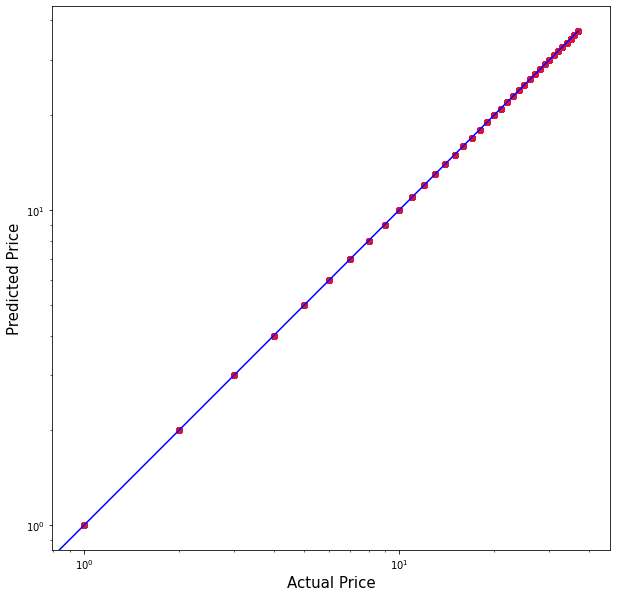

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()